<a href="https://colab.research.google.com/github/SiracencoSerghei/linear_algebra/blob/main/3.2_SVD/3.2_5_percentVariance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

---
# Convert singular values to percent variance
---

In [2]:
# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

[[ 0.25503385  0.34813587  0.46003336 ...  2.49110227  2.57934359
   2.39802493]
 [ 0.77104047  1.1754596   1.6160157  ...  3.29005475  3.39136216
   3.12473698]
 [ 1.59335595  2.43541186  3.30609758 ...  4.08416797  4.20794089
   3.87176573]
 ...
 [ 6.10263663  7.69384626  9.01557251 ... -1.02891379 -1.26815017
  -1.22003633]
 [ 4.77326565  6.33210263  7.87273644 ... -0.14504681 -0.52843814
  -0.62727252]
 [ 3.53891797  4.93956591  6.49317093 ...  0.86728374  0.38715524
   0.13804419]]
 
[[ 3.89373342e-08  5.31517000e-08  7.02356670e-08 ...  3.80329435e-07
   3.93801693e-07  3.66118837e-07]
 [ 1.17718726e-07  1.79463481e-07  2.46725453e-07 ...  5.02309632e-07
   5.17776756e-07  4.77069716e-07]
 [ 2.43265872e-07  3.71826892e-07  5.04758973e-07 ...  6.23550994e-07
   6.42448043e-07  5.91122448e-07]
 ...
 [ 9.31721016e-07  1.17465920e-06  1.37645397e-06 ... -1.57089576e-07
  -1.93615028e-07 -1.86269241e-07]
 [ 7.28759092e-07  9.66754774e-07  1.20197129e-06 ... -2.21450448e-08
  -8.067937

<ipython-input-9-cf7fb42d04cb>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


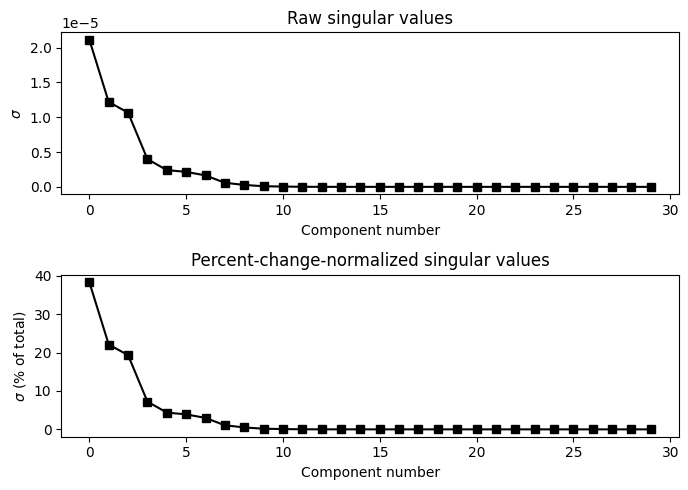

In [9]:
Ascaled = A*10
# Ascaled = A/6549854
# print(A), print(' ')
# print(Ascaled), print(' ')

# SVD
U,s,V = np.linalg.svd(Ascaled)

# convert to percent variance
spct = 100*s/np.sum(s)

# plot the singular values for comparison
fig = plt.subplots(1,figsize=(7,5))

plt.subplot(211)
plt.plot(s,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('Raw singular values')

plt.subplot(212)
plt.plot(spct,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ (% of total)')
plt.title('Percent-change-normalized singular values')

plt.tight_layout()
plt.show()

---
# Code Challenge:  When is UV^T valid, what is its norm, and is it orthogonal?
---

In [14]:
# generate a matrix such that U@V is valid
A = np.random.randn(5,5)
U,S,V = np.linalg.svd(A)

# norm of U, norm of V
print(np.linalg.norm(U,2))
print(np.linalg.norm(V,2))

# norm of U@V
print(np.linalg.norm(U@V,2))

1.0000000000000002
1.0000000000000002
1.0000000000000002


In [15]:
# compute U@U', V'@V, U@V
print(np.round(U@U.T,3)), print(' ')
print(np.round(V.T@V,3)), print(' ')

[[ 1. -0.  0. -0.  0.]
 [-0.  1. -0.  0. -0.]
 [ 0. -0.  1.  0. -0.]
 [-0.  0.  0.  1.  0.]
 [ 0. -0. -0.  0.  1.]]
 
[[ 1. -0.  0. -0.  0.]
 [-0.  1. -0. -0. -0.]
 [ 0. -0.  1. -0. -0.]
 [-0. -0. -0.  1.  0.]
 [ 0. -0. -0.  0.  1.]]
 


(None, None)

In [16]:
print(np.round(U@V,3)), print(' ')

C = U@V
print(np.round(C@C.T,3))

[[ 0.474  0.097  0.122 -0.708 -0.499]
 [ 0.25   0.824  0.417  0.214  0.197]
 [ 0.701 -0.037 -0.58   0.078  0.406]
 [ 0.467 -0.444  0.461  0.536 -0.291]
 [-0.057  0.335 -0.512  0.399 -0.68 ]]
 
[[ 1. -0. -0. -0. -0.]
 [-0.  1. -0.  0. -0.]
 [-0. -0.  1. -0. -0.]
 [-0.  0. -0.  1.  0.]
 [-0. -0. -0.  0.  1.]]
